In [69]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as stat   
import seaborn as sns
import pdb
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegressionCV


# load each instance to a pandas dataframe

In [70]:
Data={}
for SubfolderName in ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']: ## There are seven subfolders in our dataset eg. bending1, bending2, ...  
    files = os.listdir(r"Git\data/" + SubfolderName) ## accessing each file from each subfolder
     
    for file in files:  
        ## dataset4 in bending2 has beed modified using excel to be similar to the others. 
        clmns = ['time','avg_RSS12', 'var_RSS12', 'avg_RSS13', 'var_RSS13', 'avg_RSS23', 'var_RSS23']
        Data[SubfolderName + "_" + file] = pd.read_csv(r"Git\data/" + SubfolderName + "/" + file, delimiter=",", skiprows=5, names=clmns)
        # we skip 5 rows in the excel file, and read the remaining rows into a dataframe
Data['bending2_dataset4.csv']

,time,avg_RSS12,var_RSS12,avg_RSS13,var_RSS13,avg_RSS23,var_RSS23
0,0,32.50,0.50,0.00,0.00,19.00,1.00
1,250,32.50,0.50,0.00,0.00,18.50,0.50
2,500,32.75,0.43,1.00,0.00,18.00,0.00
3,750,32.50,0.50,0.00,0.00,17.50,0.50
4,1000,32.50,0.50,7.50,0.50,17.50,0.87
...,...,...,...,...,...,...,...
475,118750,28.67,0.47,4.67,1.25,17.33,0.47
476,119000,27.50,0.50,5.50,2.50,17.25,1.30
477,119250,28.00,0.00,6.67,0.94,17.00,1.00
478,119500,28.00,0.00,5.00,0.82,17.00,0.71


###  Keeping datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data.

In [71]:
test_data = {'bending1_dataset1.csv':Data['bending1_dataset1.csv'],'bending1_dataset2.csv':Data['bending1_dataset2.csv'],
            'bending2_dataset1.csv':Data['bending2_dataset1.csv'] ,'bending2_dataset2.csv':Data['bending2_dataset2.csv'],
            'cycling_dataset1.csv':Data['cycling_dataset1.csv'],'cycling_dataset2.csv':Data['cycling_dataset2.csv'],'cycling_dataset3.csv':Data['cycling_dataset3.csv'],
            'walking_dataset1.csv':Data['walking_dataset1.csv'],'walking_dataset2.csv':Data['walking_dataset2.csv'],'walking_dataset3.csv':Data['walking_dataset3.csv'],
            'sitting_dataset1.csv':Data['sitting_dataset1.csv'],'sitting_dataset2.csv':Data['sitting_dataset2.csv'],'sitting_dataset3.csv':Data['sitting_dataset3.csv'],
            'standing_dataset1.csv':Data['standing_dataset1.csv'],'standing_dataset2.csv':Data['standing_dataset2.csv'],'standing_dataset3.csv':Data['standing_dataset3.csv'],
            'lying_dataset1.csv':Data['lying_dataset1.csv'],'lying_dataset2.csv':Data['lying_dataset2.csv'],'lying_dataset3.csv':Data['lying_dataset3.csv']}


train_data={'bending1_dataset3.csv':Data['bending1_dataset3.csv'],'bending1_dataset4.csv':Data['bending1_dataset4.csv'],'bending1_dataset5.csv':Data['bending1_dataset5.csv'],'bending1_dataset6.csv':Data['bending1_dataset6.csv'],'bending1_dataset7.csv':Data['bending1_dataset7.csv'],
           'bending2_dataset3.csv':Data['bending2_dataset3.csv'],'bending2_dataset4.csv':Data['bending2_dataset4.csv'],'bending2_dataset5.csv':Data['bending2_dataset5.csv'],'bending2_dataset6.csv':Data['bending2_dataset6.csv'],
           'cycling_dataset4.csv':Data['cycling_dataset4.csv'],'cycling_dataset5.csv':Data['cycling_dataset5.csv'],'cycling_dataset6.csv':Data['cycling_dataset6.csv'],'cycling_dataset7.csv':Data['cycling_dataset7.csv'],'cycling_dataset8.csv':Data['cycling_dataset8.csv'],'cycling_dataset9.csv':Data['cycling_dataset9.csv'],'cycling_dataset10.csv':Data['cycling_dataset10.csv'],'cycling_dataset11.csv':Data['cycling_dataset11.csv'],'cycling_dataset12.csv':Data['cycling_dataset12.csv'],'cycling_dataset13.csv':Data['cycling_dataset13.csv'],'cycling_dataset14.csv':Data['cycling_dataset14.csv'],'cycling_dataset15.csv':Data['cycling_dataset15.csv'],
           'walking_dataset4.csv':Data['walking_dataset4.csv'],'walking_dataset5.csv':Data['walking_dataset5.csv'],'walking_dataset6.csv':Data['walking_dataset6.csv'],'walking_dataset7.csv':Data['walking_dataset7.csv'],'walking_dataset8.csv':Data['walking_dataset8.csv'],'walking_dataset9.csv':Data['walking_dataset9.csv'],'walking_dataset10.csv':Data['walking_dataset10.csv'],'walking_dataset11.csv':Data['walking_dataset11.csv'],'walking_dataset12.csv':Data['walking_dataset12.csv'],'walking_dataset13.csv':Data['walking_dataset13.csv'],'walking_dataset14.csv':Data['walking_dataset14.csv'],'walking_dataset15.csv':Data['walking_dataset15.csv'],
           'sitting_dataset4.csv':Data['sitting_dataset4.csv'],'sitting_dataset5.csv':Data['sitting_dataset5.csv'],'sitting_dataset6.csv':Data['sitting_dataset6.csv'],'sitting_dataset7.csv':Data['sitting_dataset7.csv'],'sitting_dataset8.csv':Data['sitting_dataset8.csv'],'sitting_dataset9.csv':Data['sitting_dataset9.csv'],'sitting_dataset10.csv':Data['sitting_dataset10.csv'],'sitting_dataset11.csv':Data['sitting_dataset11.csv'],'sitting_dataset12.csv':Data['sitting_dataset12.csv'],'sitting_dataset13.csv':Data['sitting_dataset13.csv'],'sitting_dataset14.csv':Data['sitting_dataset14.csv'],'sitting_dataset15.csv':Data['sitting_dataset15.csv'],
           'standing_dataset4.csv':Data['standing_dataset4.csv'],'standing_dataset5.csv':Data['standing_dataset5.csv'],'standing_dataset6.csv':Data['standing_dataset6.csv'],'standing_dataset7.csv':Data['standing_dataset7.csv'],'standing_dataset8.csv':Data['standing_dataset8.csv'],'standing_dataset9.csv':Data['standing_dataset9.csv'],'standing_dataset10.csv':Data['standing_dataset10.csv'],'standing_dataset11.csv':Data['standing_dataset11.csv'],'standing_dataset12.csv':Data['standing_dataset12.csv'],'standing_dataset13.csv':Data['standing_dataset13.csv'],'standing_dataset14.csv':Data['standing_dataset14.csv'],'standing_dataset15.csv':Data['standing_dataset15.csv'],
           'lying_dataset4.csv':Data['lying_dataset4.csv'],'lying_dataset5.csv':Data['lying_dataset5.csv'],'lying_dataset6.csv':Data['lying_dataset6.csv'],'lying_dataset7.csv':Data['lying_dataset7.csv'],'lying_dataset8.csv':Data['lying_dataset8.csv'],'lying_dataset9.csv':Data['lying_dataset9.csv'],'lying_dataset10.csv':Data['lying_dataset10.csv'],'lying_dataset11.csv':Data['lying_dataset11.csv'],'lying_dataset12.csv':Data['lying_dataset12.csv'],'lying_dataset13.csv':Data['lying_dataset13.csv'],'lying_dataset14.csv':Data['lying_dataset14.csv'],'lying_dataset15.csv':Data['lying_dataset15.csv']}

test_data['lying_dataset1.csv']


,time,avg_RSS12,var_RSS12,avg_RSS13,var_RSS13,avg_RSS23,var_RSS23
0,0,29.00,0.00,9.00,0.71,8.50,0.50
1,250,29.00,0.00,8.00,0.71,8.50,0.50
2,500,29.00,0.00,8.00,0.71,8.00,1.00
3,750,28.50,0.50,8.25,0.43,8.75,0.43
4,1000,29.00,0.00,8.75,1.09,9.00,0.00
...,...,...,...,...,...,...,...
475,118750,29.25,0.43,4.00,0.00,10.50,0.50
476,119000,29.25,0.43,4.00,0.00,10.25,0.83
477,119250,29.50,0.50,2.33,0.94,9.67,0.94
478,119500,29.00,0.00,2.67,0.47,10.00,0.82


###  types of time-domain features are usually used in time series classification

There are a number of time-domain features used in time series classifications. A number of these features are listed below: 
1- Minimum

2- maximum 

3- mean 

4- first quartile

5- third quartile

6- Standard Deviation 

7- Coeffiecient of skewness 

8- Coeffiecient of kurtosis 

9-Range

10-inter-quartile range

11-median



###  Extracting the time-domain features minimum, maximum, mean, median, stan-dard deviation, first quartile, and third quartile for all of the 6 time series in each instance

In [72]:
Data

{'bending1_dataset1.csv':        time  avg_RSS12  var_RSS12  avg_RSS13  var_RSS13  avg_RSS23  var_RSS23
 0         0      39.25       0.43      22.75       0.43      33.75        1.3
 1       250      39.25       0.43      23.00       0.00      33.00        0.0
 2       500      39.25       0.43      23.25       0.43      33.00        0.0
 3       750      39.50       0.50      23.00       0.71      33.00        0.0
 4      1000      39.50       0.50      24.00       0.00      33.00        0.0
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      43.33       0.47      25.00       0.00      30.00        0.0
 476  119000      43.50       0.50      25.50       0.50      30.00        0.0
 477  119250      43.50       0.50      24.75       0.43      30.00        0.0
 478  119500      43.50       0.50      24.33       0.47      30.00        0.0
 479  119750      43.50       0.50      24.25       0.43      30.00        0.0
 
 [480 rows x 7 columns],


In [73]:
instances=[]
ith_instance=[]
df=list(Data.values())
for i in range(88):
    
    ith_instance=[min(df[i]['avg_RSS12']),
    max(df[i]['avg_RSS12']),
    stat.mean(df[i]['avg_RSS12']),
    stat.median(df[i]['avg_RSS12']),
    df[i]['avg_RSS12'].std(),
    df[i]['avg_RSS12'].quantile(0.25),
    df[i]['avg_RSS12'].quantile(0.75),
    min(df[i]['var_RSS12']),
    max(df[i]['var_RSS12']),
    stat.mean(df[i]['var_RSS12']),
    stat.median(df[i]['var_RSS12']),
    df[i]['var_RSS12'].std(),
    df[i]['var_RSS12'].quantile(0.25),
    df[i]['var_RSS12'].quantile(0.75),
    min(df[i]['avg_RSS13']),
    max(df[i]['avg_RSS13']),
    stat.mean(df[i]['avg_RSS13']),
    stat.median(df[i]['avg_RSS13']),
    df[i]['avg_RSS13'].std(),
    df[i]['avg_RSS13'].quantile(0.25),
    df[i]['avg_RSS13'].quantile(0.75),
    min(df[i]['var_RSS13']),
    max(df[i]['var_RSS13']),
    stat.mean(df[i]['var_RSS13']),
    stat.median(df[i]['var_RSS13']),
    df[i]['var_RSS13'].std(),
    df[i]['var_RSS13'].quantile(0.25),
    df[i]['var_RSS13'].quantile(0.75),
    min(df[i]['avg_RSS23']),
    max(df[i]['avg_RSS23']),
    stat.mean(df[i]['avg_RSS23']),
    stat.median(df[i]['avg_RSS23']),
    df[i]['avg_RSS23'].std(),
    df[i]['avg_RSS23'].quantile(0.25),
    df[i]['avg_RSS23'].quantile(0.75),
    min(df[i]['var_RSS23']),
    max(df[i]['var_RSS23']),
    stat.mean(df[i]['var_RSS23']),
    stat.median(df[i]['var_RSS23']),
    df[i]['var_RSS23'].std(),
    df[i]['var_RSS23'].quantile(0.25),
    df[i]['var_RSS23'].quantile(0.75)]
    instances.append(ith_instance)

df_instances=pd.DataFrame(instances,columns=['min1','max1','mean1','median1','standard deviation1','1st quart1','3rd quart1','min2','max2','mean2','median2','standard deviation2','1st quart2','3rd quart2','min3','max3','mean3','median3','standard deviation3','1st quart3','3rd quart3','min4','max4','mean4','median4','standard deviation4','1st quart4','3rd quart4','min5','max5','mean5','median5','standard deviation5','1st quart5','3rd quart5','min6','max6','mean6','median6','standard deviation6','1st quart6','3rd quart6'])

df_instances


,min1,max1,mean1,median1,standard deviation1,1st quart1,3rd quart1,min2,max2,mean2,...,standard deviation5,1st quart5,3rd quart5,min6,max6,mean6,median6,standard deviation6,1st quart6,3rd quart6
0,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
3,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
84,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
85,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200
86,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,2.905688,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600


###  Estimating the standard deviation of each of the time-domain features you extracted from the data. Then, using Python’s bootstrapped to build a 90% bootsrap confidence interval for the standard deviation of each feature

In [74]:
confInterval = {}
for features in df_instances.columns:
    sD = []
    for i in range(0,2000):
        sample = df_instances[features].sample(n=88)
        stanDev = sample.std()
        sD.append(stanDev)
    sD.sort()
    ## We can get 90% confidence interval by droping 5% lowest values and 5% greatest values.
    
    
    confInterval[features] = [np.percentile(sD, 0.05),np.percentile(sD, 0.95)]

In [75]:
print("90% confidence interval of each  feature is: \n")
confInterval

90% confidence interval of each  feature is: 



{'min1': [9.569975284512806, 9.569975284512806],
 'max1': [4.394361684703189, 4.394361684703189],
 'mean1': [5.335717658344172, 5.335717658344173],
 'median1': [5.440054137152634, 5.440054137152634],
 'standard deviation1': [1.7721533975028403, 1.7721533975028403],
 '1st quart1': [6.153589724185369, 6.15358972418537],
 '3rd quart1': [5.138924613450996, 5.138924613450997],
 'min2': [0.0, 0.0],
 'max2': [5.062729374810638, 5.062729374810639],
 'mean2': [1.5741639200745132, 1.5741639200745134],
 'median2': [1.412244164974563, 1.4122441649745632],
 'standard deviation2': [0.8841054781862708, 0.8841054781862709],
 '1st quart2': [0.9463861911256928, 0.9463861911256928],
 '3rd quart2': [2.1252664064059097, 2.1252664064059097],
 'min3': [2.956462059205817, 2.956462059205817],
 'max3': [4.875136693954742, 4.875136693954743],
 'mean3': [4.008380131777646, 4.008380131777647],
 'median3': [4.036396318784073, 4.036396318784073],
 'standard deviation3': [0.9467102620752951, 0.9467102620752952],
 '1s

In [76]:
## We will keep 1st quartile, median and 3rd qurtile. We can use training dataset to take out these features. 


df_KeptData = df_instances[["1st quart1", "median1", "3rd quart1", "1st quart2", "median2", "3rd quart2", "1st quart6", "median6", "3rd quart6"]]
df_KeptData["bending"] = [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  

# 1 for bending, 0 for other activities
df_KeptData

,1st quart1,median1,3rd quart1,1st quart2,median2,3rd quart2,1st quart6,median6,3rd quart6,bending
0,39.25,40.500,42.0000,0.00,0.430,0.5000,0.00,0.430,1.3000,1
1,42.00,42.500,43.6700,0.00,0.470,0.5000,0.00,0.430,1.3000,1
2,43.00,44.330,45.0000,0.00,0.470,0.5000,0.00,0.430,0.9400,1
3,39.15,43.500,45.0000,0.00,0.500,1.1200,0.00,0.500,1.0000,1
4,41.33,41.750,42.7500,0.43,0.500,0.7100,0.00,0.430,0.5000,1
...,...,...,...,...,...,...,...,...,...,...
83,31.67,35.290,38.2500,2.49,3.900,5.7225,2.05,3.270,4.3050,0
84,32.00,35.500,38.0625,2.35,3.845,5.6250,2.12,3.015,4.5000,0
85,31.25,34.750,38.0000,2.49,3.900,5.7450,2.05,2.980,4.3200,0
86,31.50,35.125,38.0000,2.55,4.025,5.7675,2.12,3.015,4.2600,0


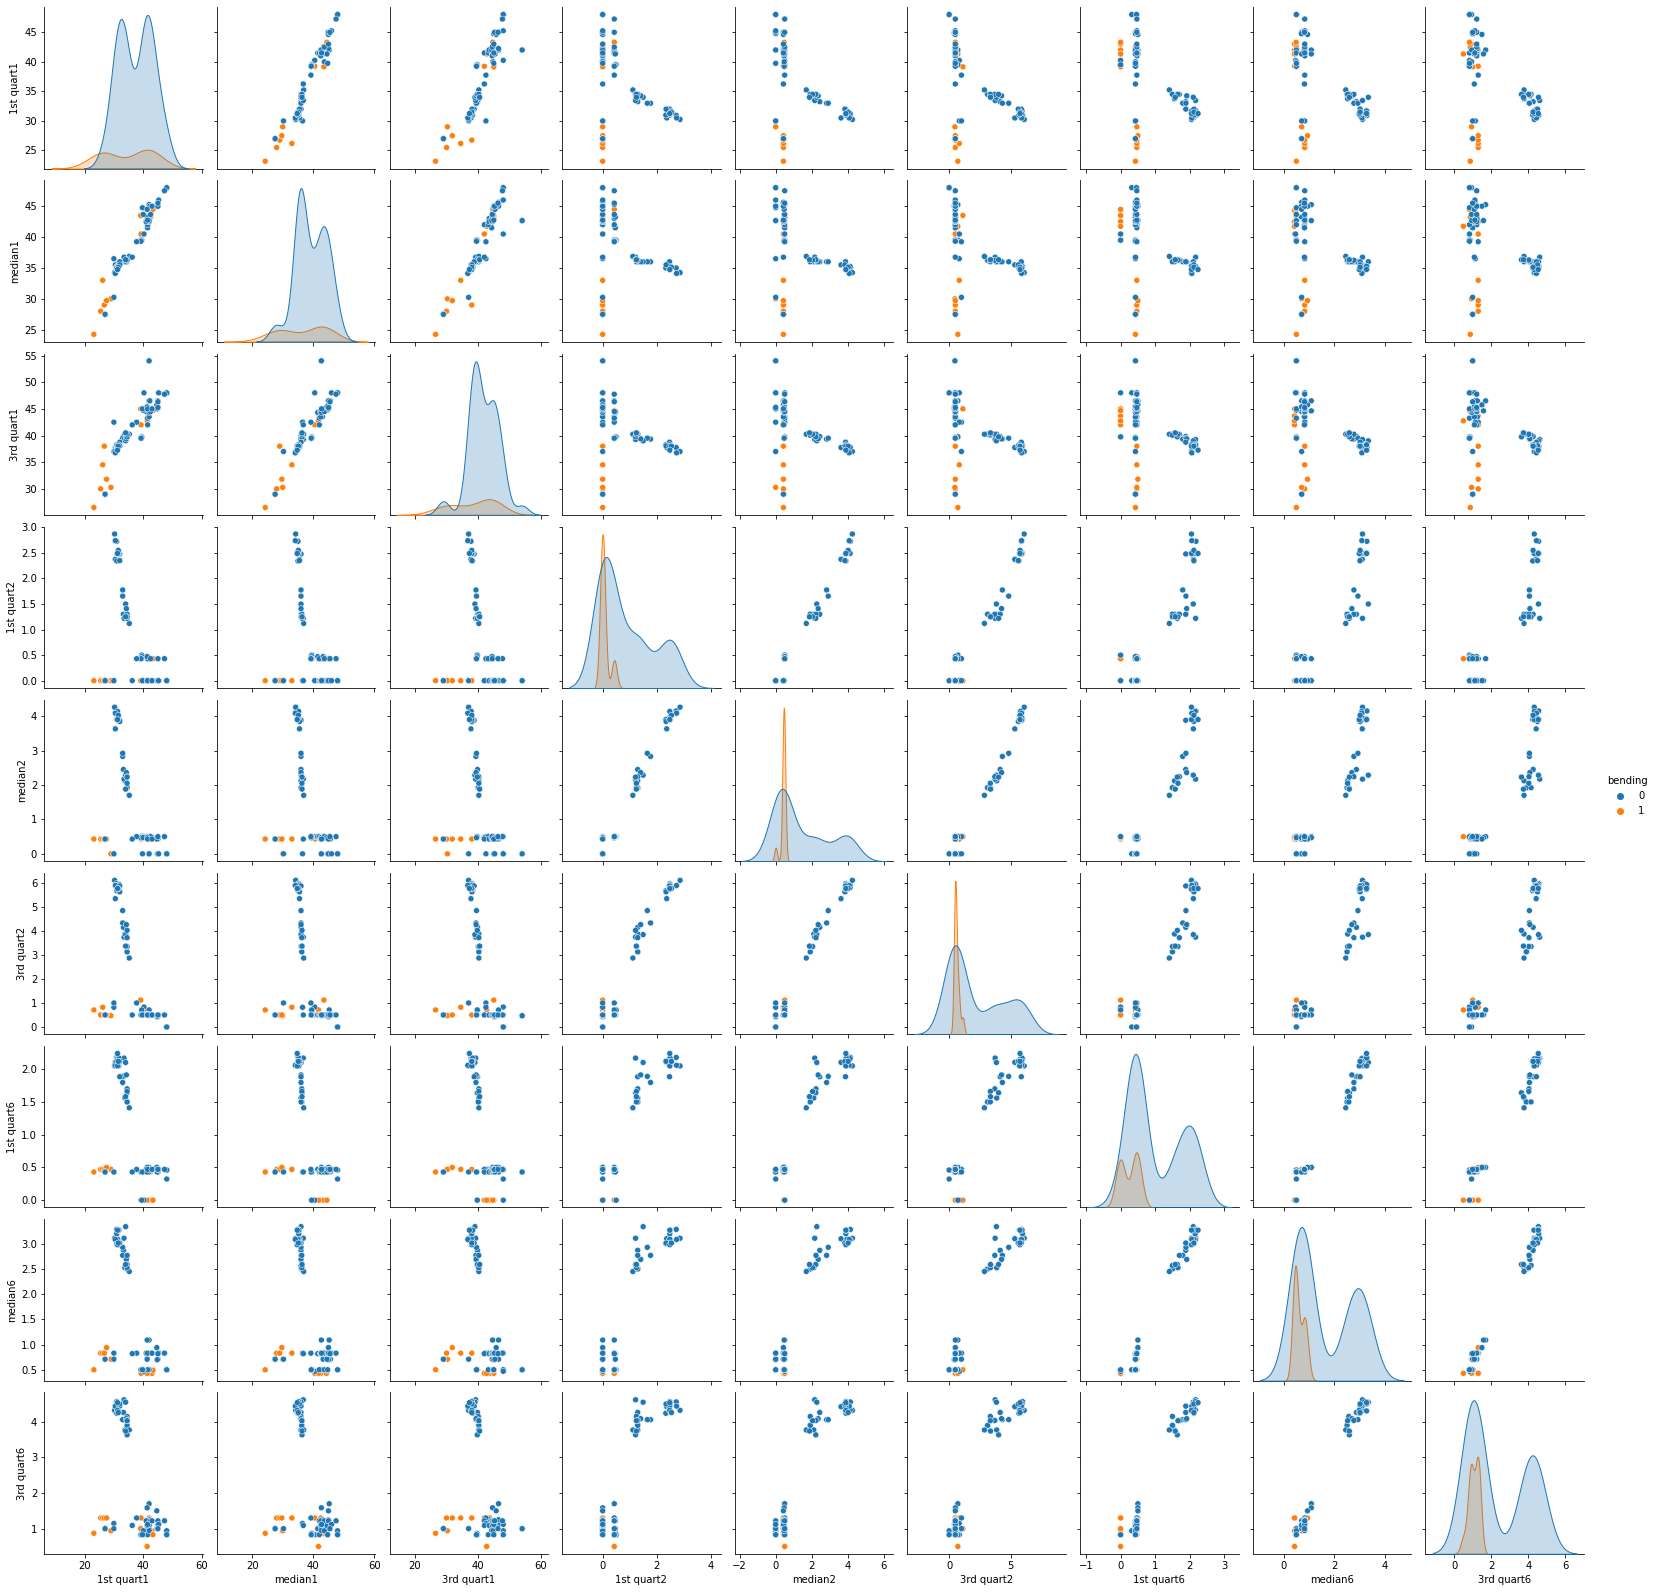

In [77]:
sns.pairplot(df_KeptData, hue="bending")
plt.show()

In [78]:
new_data = {}
import math

for file, dataframe in Data.items():
    length=int(len(dataframe))
    length_2=math.floor(length/2)
    
    if (length_2%2==0):
        avg_RSS12 = dataframe["avg_RSS12"][0:int(length_2)]
        avg_RSS12_1 = dataframe["avg_RSS12"][int(length_2):]
        var_RSS12 = dataframe["var_RSS12"][0:int(length_2)]
        var_RSS12_1 = dataframe["var_RSS12"][int(length_2):]
        avg_RSS13 = dataframe["avg_RSS13"][0:int(length_2)]
        avg_RSS13_1 = dataframe["avg_RSS13"][int(length_2):]
        var_RSS13 = dataframe["var_RSS13"][0:int(length_2)]
        var_RSS13_1 = dataframe["var_RSS13"][int(length_2):]
        avg_RSS23 = dataframe["avg_RSS23"][0:int(length_2)]
        avg_RSS23_1 = dataframe["avg_RSS23"][int(length_2):]
        var_RSS23 = dataframe["var_RSS23"][0:int(length_2)]
        var_RSS23_1 = dataframe["var_RSS23"][int(length_2):]
    else:
        avg_RSS12 = dataframe["avg_RSS12"][0:int(length_2)]
        avg_RSS12_1 = dataframe["avg_RSS12"][int(length_2)+1:]
        var_RSS12 = dataframe["var_RSS12"][0:int(length_2)]
        var_RSS12_1 = dataframe["var_RSS12"][int(length_2)+1:]
        avg_RSS13 = dataframe["avg_RSS13"][0:int(length_2)]
        avg_RSS13_1 = dataframe["avg_RSS13"][int(length_2)+1:]
        var_RSS13 = dataframe["var_RSS13"][0:int(length_2)]
        var_RSS13_1 = dataframe["var_RSS13"][int(length_2)+1:]
        avg_RSS23 = dataframe["avg_RSS23"][0:int(length_2)]
        avg_RSS23_1 = dataframe["avg_RSS23"][int(length_2)+1:]
        var_RSS23 = dataframe["var_RSS23"][0:int(length_2)]
        var_RSS23_1 = dataframe["var_RSS23"][int(length_2)+1:]


    new_data[file] = pd.DataFrame({'avg_RSS12': list(avg_RSS12),'var_RSS12': list(var_RSS12),'avg_RSS13': list(avg_RSS13),'var_RSS13': list(var_RSS13),
                                 'avg_RSS23': list(avg_RSS23),'var_RSS23': list(var_RSS23),'avg_RSS12_1': list(avg_RSS12_1),'var_RSS12_1': list(var_RSS12_1),
                                 'avg_RSS13_1': list(avg_RSS13_1),'var_RSS13_1': list(var_RSS13_1),'avg_RSS23_1': list(avg_RSS23_1),'var_RSS23_1': list(var_RSS23_1)})


In [79]:
instances=[]
ith_instance=[]
df=list(new_data.values())
for i in range(88):
    
    ith_instance=[min(df[i]['avg_RSS12']),
    max(df[i]['avg_RSS12']),
    stat.mean(df[i]['avg_RSS12']),
    stat.median(df[i]['avg_RSS12']),
    df[i]['avg_RSS12'].std(),
    df[i]['avg_RSS12'].quantile(0.25),
    df[i]['avg_RSS12'].quantile(0.75),
    min(df[i]['var_RSS12']),
    max(df[i]['var_RSS12']),
    stat.mean(df[i]['var_RSS12']),
    stat.median(df[i]['var_RSS12']),
    df[i]['var_RSS12'].std(),
    df[i]['var_RSS12'].quantile(0.25),
    df[i]['var_RSS12'].quantile(0.75),
    min(df[i]['avg_RSS13']),
    max(df[i]['avg_RSS13']),
    stat.mean(df[i]['avg_RSS13']),
    stat.median(df[i]['avg_RSS13']),
    df[i]['avg_RSS13'].std(),
    df[i]['avg_RSS13'].quantile(0.25),
    df[i]['avg_RSS13'].quantile(0.75),
    min(df[i]['var_RSS13']),
    max(df[i]['var_RSS13']),
    stat.mean(df[i]['var_RSS13']),
    stat.median(df[i]['var_RSS13']),
    df[i]['var_RSS13'].std(),
    df[i]['var_RSS13'].quantile(0.25),
    df[i]['var_RSS13'].quantile(0.75),
    min(df[i]['avg_RSS23']),
    max(df[i]['avg_RSS23']),
    stat.mean(df[i]['avg_RSS23']),
    stat.median(df[i]['avg_RSS23']),
    df[i]['avg_RSS23'].std(),
    df[i]['avg_RSS23'].quantile(0.25),
    df[i]['avg_RSS23'].quantile(0.75),
    min(df[i]['var_RSS23']),
    max(df[i]['var_RSS23']),
    stat.mean(df[i]['var_RSS23']),
    stat.median(df[i]['var_RSS23']),
    df[i]['var_RSS23'].std(),
    df[i]['var_RSS23'].quantile(0.25),
    df[i]['var_RSS23'].quantile(0.75),
    min(df[i]['avg_RSS12_1']),
    max(df[i]['avg_RSS12_1']),
    stat.mean(df[i]['avg_RSS12_1']),
    stat.median(df[i]['avg_RSS12_1']),
    df[i]['avg_RSS12_1'].std(),
    df[i]['avg_RSS12_1'].quantile(0.25),
    df[i]['avg_RSS12_1'].quantile(0.75),
    min(df[i]['var_RSS12_1']),
    max(df[i]['var_RSS12_1']),
    stat.mean(df[i]['var_RSS12_1']),
    stat.median(df[i]['var_RSS12_1']),
    df[i]['var_RSS12_1'].std(),
    df[i]['var_RSS12_1'].quantile(0.25),
    df[i]['var_RSS12_1'].quantile(0.75),
    min(df[i]['avg_RSS13_1']),
    max(df[i]['avg_RSS13_1']),
    stat.mean(df[i]['avg_RSS13_1']),
    stat.median(df[i]['avg_RSS13_1']),
    df[i]['avg_RSS13_1'].std(),
    df[i]['avg_RSS13_1'].quantile(0.25),
    df[i]['avg_RSS13_1'].quantile(0.75),
    min(df[i]['var_RSS13_1']),
    max(df[i]['var_RSS13_1']),
    stat.mean(df[i]['var_RSS13_1']),
    stat.median(df[i]['var_RSS13_1']),
    df[i]['var_RSS13_1'].std(),
    df[i]['var_RSS13_1'].quantile(0.25),
    df[i]['var_RSS13_1'].quantile(0.75),
    min(df[i]['avg_RSS23_1']),
    max(df[i]['avg_RSS23_1']),
    stat.mean(df[i]['avg_RSS23_1']),
    stat.median(df[i]['avg_RSS23_1']),
    df[i]['avg_RSS23_1'].std(),
    df[i]['avg_RSS23_1'].quantile(0.25),
    df[i]['avg_RSS23_1'].quantile(0.75),
    min(df[i]['var_RSS23_1']),
    max(df[i]['var_RSS23_1']),
    stat.mean(df[i]['var_RSS23_1']),
    stat.median(df[i]['var_RSS23_1']),
    df[i]['var_RSS23_1'].std(),
    df[i]['var_RSS23_1'].quantile(0.25),
    df[i]['var_RSS23_1'].quantile(0.75)]
    instances.append(ith_instance)

df_instances=pd.DataFrame(instances,columns=['min1','max1','mean1','median1','standard deviation1','1st quart1','3rd quart1','min2','max2','mean2','median2','standard deviation2','1st quart2','3rd quart2','min3','max3','mean3','median3','standard deviation3','1st quart3','3rd quart3','min4','max4','mean4','median4','standard deviation4','1st quart4','3rd quart4','min5','max5','mean5','median5','standard deviation5','1st quart5','3rd quart5','min6','max6','mean6','median6','standard deviation6','1st quart6','3rd quart6','min7','max7','mean7','median7','standard deviation7','1st quart7','3rd quart7',
                                            'min8','max8','mean8','median8','standard deviation8','1st quart8','3rd quart8',
                                            'min9','max9','mean9','median9','standard deviation9','1st quart9','3rd quart9',
                                            'min10','max10','mean10','median10','standard deviation10','1st quart10','3rd quart10',
                                            'min11','max11','mean11','median11','standard deviation11','1st quart11','3rd quart11',
                                            'min12','max12','mean12','median12','standard deviation12','1st quart12','3rd quart12'])

df_instances


,min1,max1,mean1,median1,standard deviation1,1st quart1,3rd quart1,min2,max2,mean2,...,standard deviation11,1st quart11,3rd quart11,min12,max12,mean12,median12,standard deviation12,1st quart12,3rd quart12
0,38.00,42.33,40.946958,41.250,1.102963,40.3100,42.0000,0.0,1.22,0.375667,...,2.838110,31.3100,36.5000,0.00,1.92,0.552167,0.430,0.510494,0.00,0.9400
1,41.75,44.25,42.643292,42.500,0.641849,42.0000,43.3300,0.0,0.94,0.355000,...,2.283931,30.0000,33.7500,0.00,3.11,0.533583,0.430,0.575061,0.00,0.8700
2,36.50,46.50,44.057167,44.500,1.556971,43.2500,45.0000,0.0,1.50,0.381042,...,2.298693,33.0000,36.2500,0.00,1.50,0.388333,0.000,0.478528,0.00,0.7100
3,33.75,47.75,43.278875,45.000,3.473355,42.0000,45.2500,0.0,3.00,0.673292,...,3.760118,28.7500,33.7500,0.00,2.18,0.586083,0.470,0.491873,0.00,0.8700
4,33.00,45.75,41.621208,42.330,3.118644,39.6525,44.2500,0.0,2.83,0.623083,...,2.062647,28.3100,30.5625,0.00,1.50,0.347500,0.430,0.363144,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,22.33,46.00,34.966250,35.500,4.733014,32.0000,38.7500,0.0,12.68,4.207958,...,3.325780,14.0000,18.5000,0.00,9.39,3.430208,3.350,1.647979,2.17,4.4400
84,21.50,45.67,34.737042,35.500,4.276717,32.0000,37.7500,0.0,12.21,4.217333,...,3.148561,14.5000,18.2500,0.00,10.21,3.225917,3.085,1.665326,2.05,4.3500
85,18.33,45.00,33.886458,34.375,5.143776,30.4575,37.5000,0.0,12.44,4.332208,...,3.389030,13.6275,18.2500,0.00,8.01,3.274750,2.955,1.670593,2.05,4.4375
86,18.33,44.00,34.836458,35.750,4.869092,32.0000,38.6900,0.0,12.38,4.257750,...,2.882455,13.9375,18.2500,0.47,8.84,3.409458,3.110,1.707089,2.17,4.3450


In [80]:
#plot the data with the required features
df_KeptData2 = df_instances[["1st quart1", "median1", "3rd quart1", "1st quart2", "median2", "3rd quart2", "1st quart12", "median12", "3rd quart12"]]
df_KeptData2["bending"] = [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  

# 1 for bending, 0 for other activities
df_KeptData2

,1st quart1,median1,3rd quart1,1st quart2,median2,3rd quart2,1st quart12,median12,3rd quart12,bending
0,40.3100,41.250,42.0000,0.0000,0.470,0.5000,0.00,0.430,0.9400,1
1,42.0000,42.500,43.3300,0.0000,0.470,0.5000,0.00,0.430,0.8700,1
2,43.2500,44.500,45.0000,0.0000,0.470,0.5000,0.00,0.000,0.7100,1
3,42.0000,45.000,45.2500,0.0000,0.485,1.0000,0.00,0.470,0.8700,1
4,39.6525,42.330,44.2500,0.4300,0.500,0.8300,0.00,0.430,0.5000,1
...,...,...,...,...,...,...,...,...,...,...
83,32.0000,35.500,38.7500,2.4800,3.900,5.7450,2.17,3.350,4.4400,0
84,32.0000,35.500,37.7500,2.3750,4.030,5.7000,2.05,3.085,4.3500,0
85,30.4575,34.375,37.5000,2.4900,3.900,5.6425,2.05,2.955,4.4375,0
86,32.0000,35.750,38.6900,2.4500,3.770,5.5425,2.17,3.110,4.3450,0


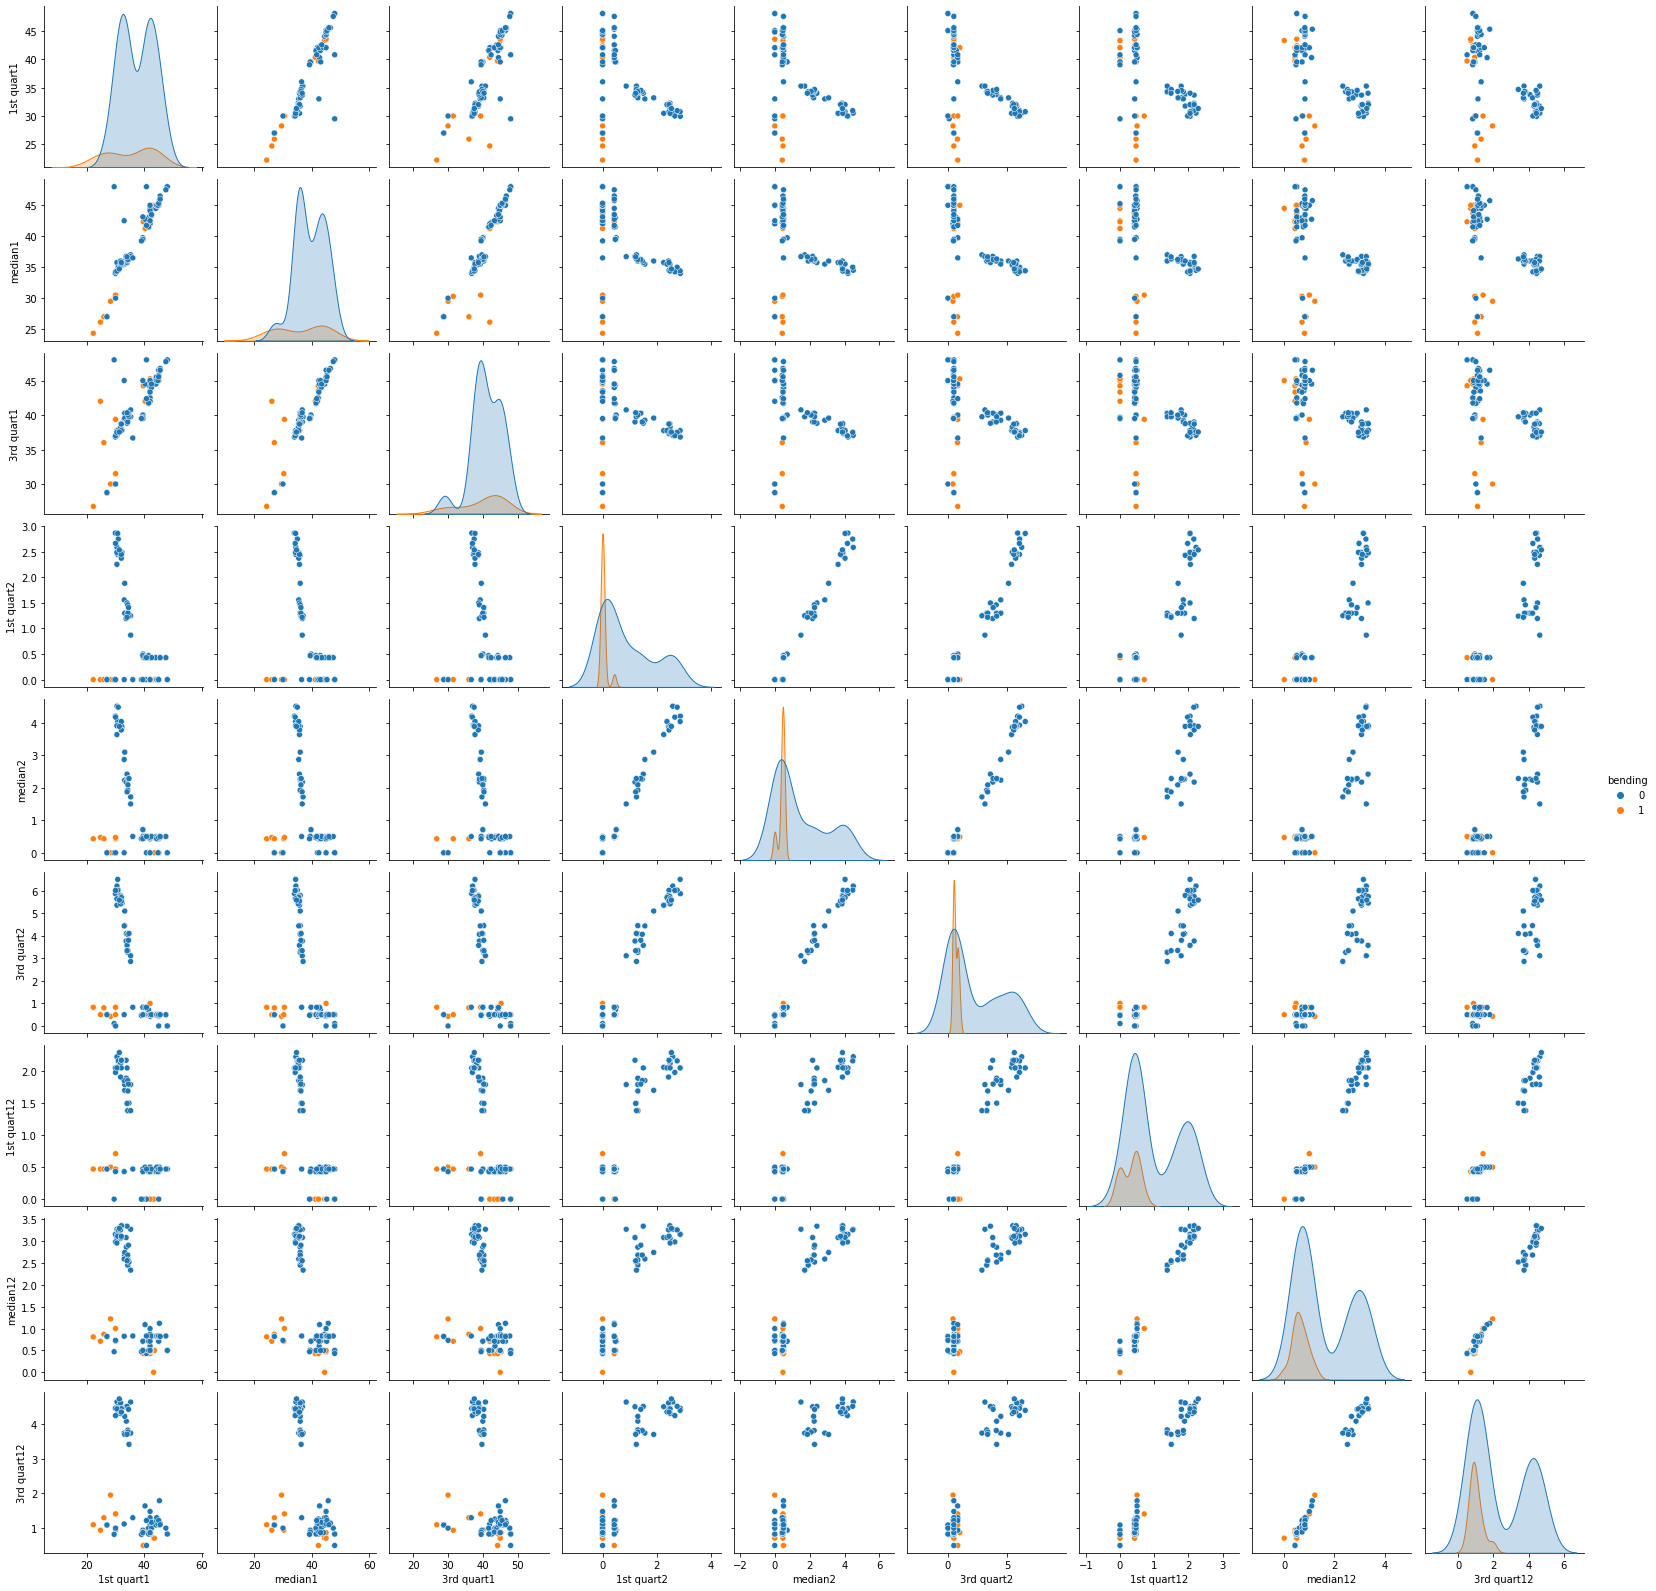

In [81]:
sns.pairplot(df_KeptData2, hue="bending")

no considerable change observed

The right way is to apply cross-validation in parallel with both selecting the significant predictors and applying the classifier.

In [82]:
#the splits has been done by excel and has been saved in the data folder. now we load them:
data_new={}
data_new[1]=pd.read_csv(r'Git\data\timeseries1.csv')
data_new[2]=pd.read_csv(r'Git\data\timeseries2.csv')
data_new[3]=pd.read_csv(r'Git\data\timeseries3.csv')
data_new[4]=pd.read_csv(r'Git\data\timeseries4.csv')
data_new[5]=pd.read_csv(r'Git\data\timeseries5.csv')
data_new[6]=pd.read_csv(r'Git\data\timeseries6.csv')
data_new[7]=pd.read_csv(r'Git\data\timeseries7.csv')
data_new[8]=pd.read_csv(r'Git\data\timeseries8.csv')
data_new[9]=pd.read_csv(r'Git\data\timeseries9.csv')
data_new[10]=pd.read_csv(r'Git\data\timeseries10.csv')
data_new[11]=pd.read_csv(r'Git\data\timeseries11.csv')
data_new[12]=pd.read_csv(r'Git\data\timeseries12.csv')
data_new[13]=pd.read_csv(r'Git\data\timeseries13.csv')
data_new[14]=pd.read_csv(r'Git\data\timeseries14.csv')
data_new[15]=pd.read_csv(r'Git\data\timeseries15.csv')
data_new[16]=pd.read_csv(r'Git\data\timeseries16.csv')
data_new[17]=pd.read_csv(r'Git\data\timeseries17.csv')
data_new[18]=pd.read_csv(r'Git\data\timeseries18.csv')
data_new[19]=pd.read_csv(r'Git\data\timeseries19.csv')
data_new[20]=pd.read_csv(r'Git\data\timeseries20.csv')

data_new[1]


,min_avg_RSS12_1,max_avg_RSS12_1,mean_avg_RSS12_1,median_avg_RSS12_1,standard deviation_avg_RSS12_1,1st quart_avg_RSS12_1,3rd quart_avg_RSS12_1,min_var_RSS12_1,max_var_RSS12_1,mean_var_RSS12_1,...,1st quart_avg_RSS23_1,3rd quart_avg_RSS23_1,min_var_RSS23_1,max_var_RSS23_1,mean_var_RSS23_1,median_var_RSS23_1,standard deviation_var_RSS23_1,1st quart_var_RSS23_1,3rd quart_var_RSS23_1,bending
0,35.00,47.40,43.954500,44.33,1.558835,43.00,45.00,0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94,1
1,33.00,47.75,42.179812,43.50,3.670666,39.15,45.00,0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00,1
2,33.00,45.75,41.678063,41.75,2.243490,41.33,42.75,0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50,1
3,37.00,48.00,43.454958,43.25,1.386098,42.50,45.00,0,1.58,0.378083,...,22.2500,24.00,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87,1
4,36.25,48.00,43.969125,44.50,1.618364,43.31,44.67,0,1.50,0.413125,...,20.5000,23.75,0.0,2.96,0.555312,0.49,0.487826,0.00,0.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,48.00,48.25,48.004167,48.00,0.032038,48.00,48.00,0,0.43,0.007167,...,4.6700,10.00,0.0,2.50,0.641229,0.50,0.388372,0.46,0.83,0
65,39.00,41.00,39.667833,39.50,0.280158,39.50,39.75,0,1.00,0.583604,...,1.6275,9.33,0.0,3.49,0.635938,0.50,0.608399,0.00,0.83,0
66,39.00,40.00,39.433792,39.50,0.208558,39.33,39.50,0,1.00,0.422104,...,9.0000,12.33,0.0,4.06,0.582708,0.50,0.438442,0.43,0.83,0
67,39.00,56.25,47.325125,42.67,5.961280,42.00,54.00,0,8.49,0.274313,...,11.7500,18.00,0.0,5.72,0.766167,0.50,0.723953,0.43,1.00,0


In [83]:
for key,val in data_new.items():
    val.fillna(np.mean(val.iloc[43]), inplace=True)

In [84]:
data_new[20]

,min_avg_RSS12_1,max_avg_RSS12_1,mean_avg_RSS12_1,median_avg_RSS12_1,standard deviation_avg_RSS12_1,1st quart_avg_RSS12_1,3rd quart_avg_RSS12_1,min_var_RSS12_1,max_var_RSS12_1,mean_var_RSS12_1,...,1st quart_avg_RSS23_20,3rd quart_avg_RSS23_20,min_var_RSS23_20,max_var_RSS23_20,mean_var_RSS23_20,median_var_RSS23_20,standard deviation_var_RSS23_20,1st quart_var_RSS23_20,3rd quart_var_RSS23_20,bending
0,40.00,45.00,43.513750,44.040,1.627673,42.1875,45.0000,0.00,0.87,0.387500,...,36.0000,36.0000,0.00,1.30,0.183333,0.000,0.338586,0.0000,0.4300,1
1,36.00,47.50,44.097083,45.000,3.286239,43.3350,46.5000,0.00,3.00,0.651250,...,27.6675,30.0000,0.00,1.30,0.350000,0.430,0.387545,0.0000,0.4400,1
2,36.00,44.50,41.563750,42.000,2.133087,41.0000,42.5625,0.00,1.22,0.464583,...,26.6875,27.7500,0.00,1.00,0.307500,0.430,0.319514,0.0000,0.5000,1
3,41.00,46.75,44.756667,45.000,1.237226,44.8750,45.0000,0.00,1.30,0.288750,...,18.0000,22.2500,0.00,4.06,1.074583,0.830,0.954108,0.4700,1.2400,1
4,41.50,44.25,42.951250,43.165,0.801967,42.2475,43.5425,0.00,0.94,0.483333,...,22.6875,24.0000,0.00,1.73,0.671250,0.665,0.473721,0.4300,0.9400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,48.00,48.00,48.000000,48.000,0.000000,48.0000,48.0000,0.00,0.00,0.000000,...,9.3100,10.8125,0.00,1.22,0.557083,0.500,0.337542,0.4300,0.8300,0
65,39.50,40.25,39.944583,40.000,0.169423,39.9375,40.0000,0.47,1.00,0.843750,...,9.1875,12.5625,0.00,3.49,1.102083,0.830,0.961814,0.4925,1.2350,0
66,39.33,40.00,39.530833,39.500,0.179611,39.5000,39.5000,0.00,1.00,0.488333,...,17.6700,18.0000,0.00,0.50,0.269583,0.430,0.233657,0.0000,0.4700,0
67,39.00,39.67,39.455417,39.500,0.180096,39.3100,39.5425,0.00,0.50,0.454583,...,13.7300,14.3300,0.00,3.56,0.986250,0.940,0.661414,0.7250,1.0250,0


l= 1


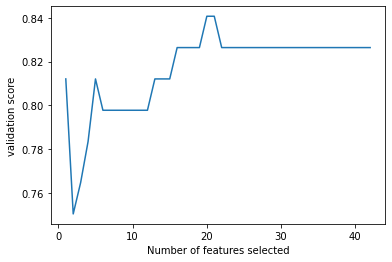

l= 2


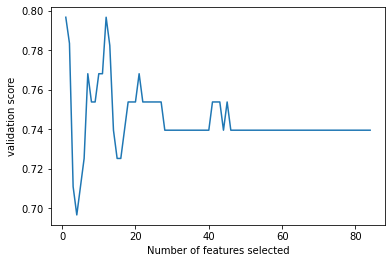

l= 3


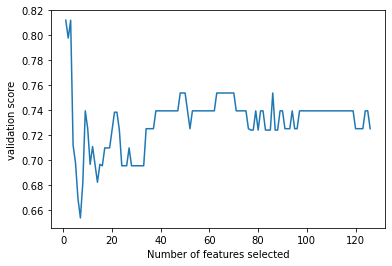

l= 4


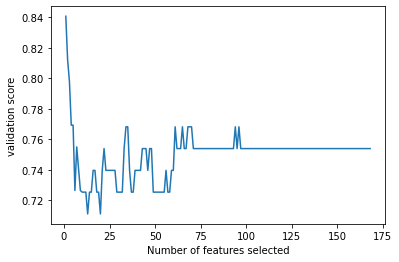

l= 5


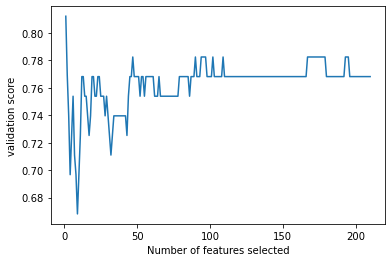

l= 6


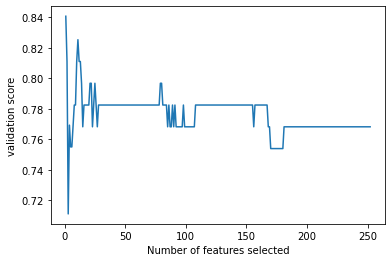

l= 7


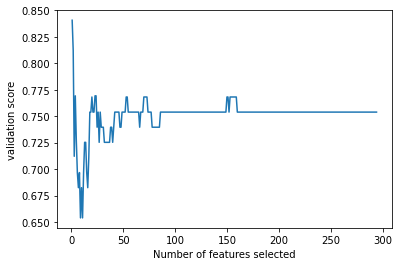

l= 8


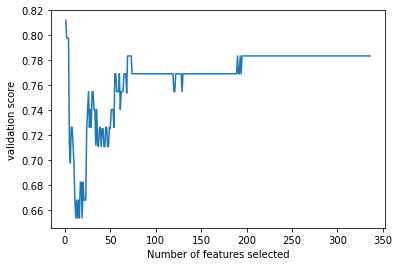

l= 9


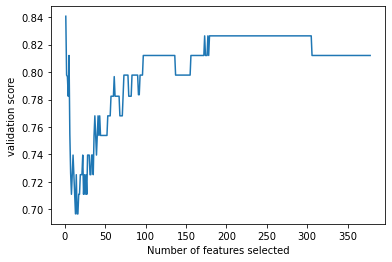

l= 10


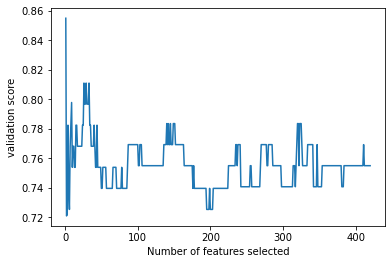

l= 11


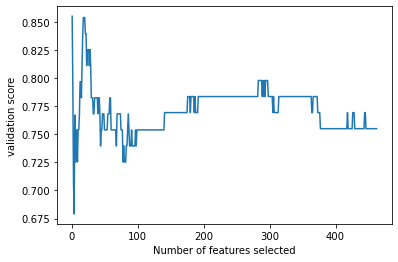

l= 12


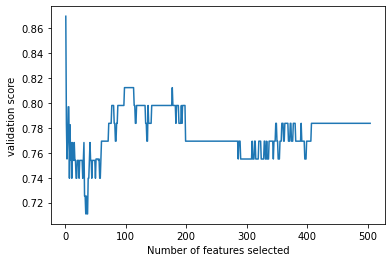

l= 13


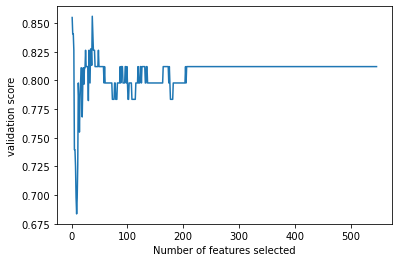

l= 14


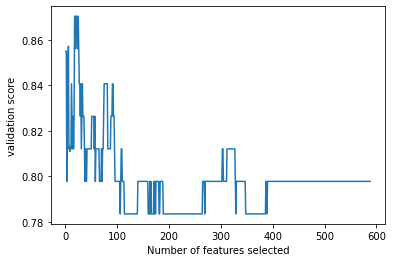

l= 15


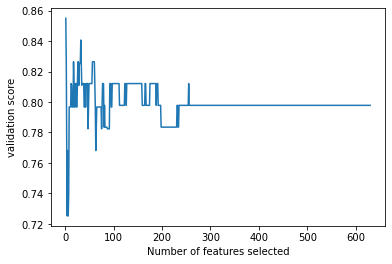

l= 16


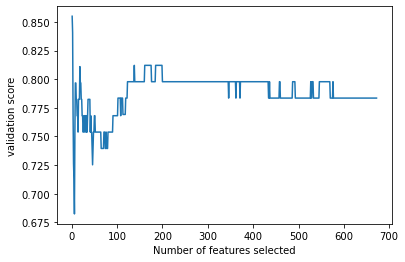

l= 17


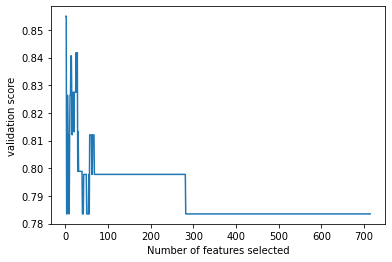

l= 18


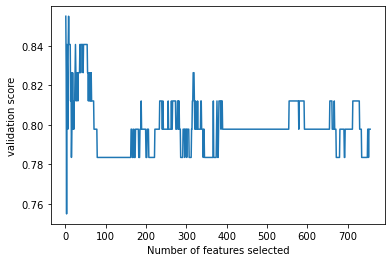

l= 19


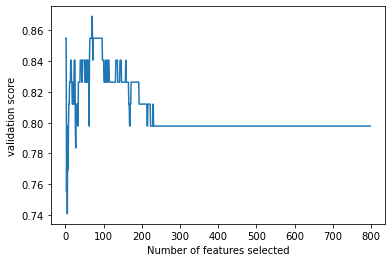

l= 20


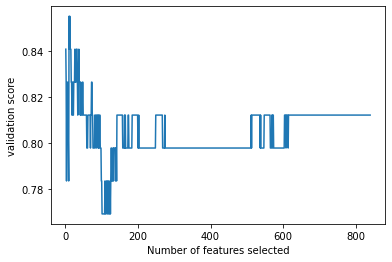

In [85]:
reg_score = {}
best_features = {}
for i in range(1,21):
    X_train = data_new[i].drop(["bending"], axis=1)
    y_train = data_new[i]["bending"]
    fold=5
    model= LogisticRegression(solver='liblinear')
    rfe_cv = RFECV(estimator=model, cv=StratifiedKFold(5),scoring='accuracy')
    rfe_cv.fit(X_train, y_train)
    plt.plot(range(1, len(rfe_cv.grid_scores_) + 1), rfe_cv.grid_scores_)
    print('l=',i)
    plt.xlabel("Number of features selected")
    plt.ylabel("validation score")
    plt.show()
    col_names = []
    for index, col in enumerate(X_train.columns):
        if rfe_cv.support_[index] == True:
            col_names.append(col) 
    best_features[i] = col_names
    reg_score[i] = rfe_cv.grid_scores_[rfe_cv.n_features_ - 1]
    

In [86]:
reg_score_data=pd.DataFrame.from_dict(reg_score,orient='index')
reg_score_data.rename(columns={0:'scores'})

,scores
1,0.840659
2,0.796703
3,0.812088
4,0.840659
5,0.812088
6,0.840659
7,0.840659
8,0.812088
9,0.840659
10,0.854945


In [87]:
import operator
max_score_index=max(reg_score.items(), key=operator.itemgetter(1))[0]
max_score_index

14

In [88]:
y_train = data_new[max_score_index][["bending"]]
best_features[max_score_index]

['median_avg_RSS13_1',
 'median_avg_RSS23_2',
 'median_avg_RSS12_4',
 'min_avg_RSS23_4',
 'min_avg_RSS12_5',
 'max_avg_RSS13_8',
 '3rd quart_avg_RSS13_8',
 'max_var_RSS13_8',
 'max_avg_RSS12_9',
 'min_avg_RSS12_10',
 'median_avg_RSS12_10',
 '3rd quart_avg_RSS12_11',
 'max_avg_RSS13_11',
 'max_var_RSS23_11',
 'max_avg_RSS13_12',
 '3rd quart_avg_RSS13_12',
 'min_avg_RSS23_13',
 'min_avg_RSS12_14']

(0.0, 1.02)

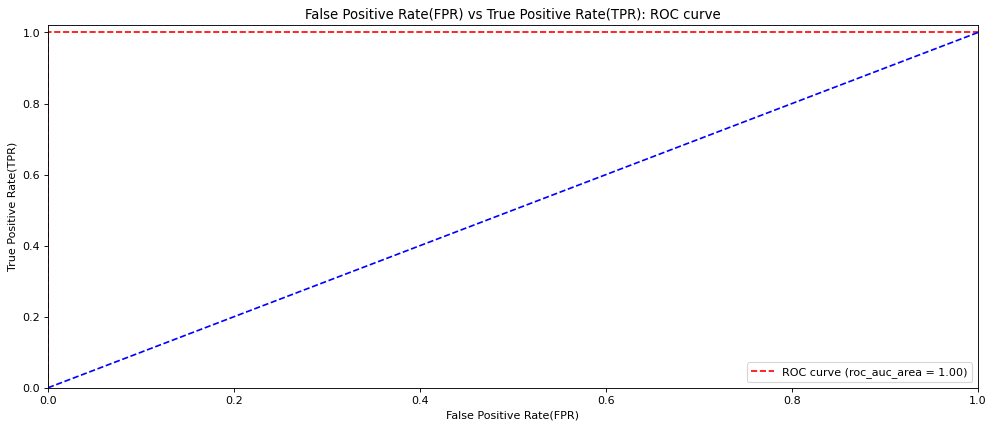

In [89]:
best_columns = best_features[max_score_index]
x_train = data_new[max_score_index][best_columns]
y_train = y_train


model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
prediction = model.predict(x_train)

fp, tp, th = roc_curve(y_train, prediction)
roc_auc = auc(fp, tp)

from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
plt.plot(fp, tp,'r--', label='ROC curve (roc_auc_area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'b--')

plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('False Positive Rate(FPR) vs True Positive Rate(TPR): ROC curve')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])




In [90]:
confusion_matrix(y_train, prediction)

array([[56,  0],
       [ 0, 13]], dtype=int64)

In [91]:
log_reg_params = sm.Logit(y_train, x_train).fit_regularized()
print(log_reg_params.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2027196988262558e-10
            Iterations: 37
            Function evaluations: 46
            Gradient evaluations: 37
                           Logit Regression Results                           
Dep. Variable:                bending   No. Observations:                   69
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                           17
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                   1.000
Time:                        19:37:02   Log-Likelihood:            -8.2988e-09
converged:                       True   LL-Null:                       -33.389
Covariance Type:            nonrobust   LLR p-value:                 7.676e-08
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

In [92]:
#the splits has been done by excel and has been saved in the data folder. now we load them:
data_new_test={}
data_new_test[1]=pd.read_csv(r'Git\data\timeseriestest1.csv')
data_new_test[2]=pd.read_csv(r'Git\data\timeseriestest2.csv')
data_new_test[3]=pd.read_csv(r'Git\data\timeseriestest3.csv')
data_new_test[4]=pd.read_csv(r'Git\data\timeseriestest4.csv')
data_new_test[5]=pd.read_csv(r'Git\data\timeseriestest5.csv')
data_new_test[6]=pd.read_csv(r'Git\data\timeseriestest6.csv')
data_new_test[7]=pd.read_csv(r'Git\data\timeseriestest7.csv')
data_new_test[8]=pd.read_csv(r'Git\data\timeseriestest8.csv')
data_new_test[9]=pd.read_csv(r'Git\data\timeseriestest9.csv')
data_new_test[10]=pd.read_csv(r'Git\data\timeseriestest10.csv')
data_new_test[11]=pd.read_csv(r'Git\data\timeseriestest11.csv')
data_new_test[12]=pd.read_csv(r'Git\data\timeseriestest12.csv')
data_new_test[13]=pd.read_csv(r'Git\data\timeseriestest13.csv')
data_new_test[14]=pd.read_csv(r'Git\data\timeseriestest14.csv')
data_new_test[15]=pd.read_csv(r'Git\data\timeseriestest15.csv')
data_new_test[16]=pd.read_csv(r'Git\data\timeseriestest16.csv')
data_new_test[17]=pd.read_csv(r'Git\data\timeseriestest17.csv')
data_new_test[18]=pd.read_csv(r'Git\data\timeseriestest18.csv')
data_new_test[19]=pd.read_csv(r'Git\data\timeseriestest19.csv')
data_new_test[20]=pd.read_csv(r'Git\data\timeseriestest20.csv')



In [93]:
for key,val in data_new_test.items():
    val.fillna(0, inplace=True)

In [94]:
data_new_test[20]

,min_avg_RSS12_1,max_avg_RSS12_1,mean_avg_RSS12_1,median_avg_RSS12_1,standard deviation_avg_RSS12_1,1st quart_avg_RSS12_1,3rd quart_avg_RSS12_1,min_var_RSS12_1,max_var_RSS12_1,mean_var_RSS12_1,...,1st quart_avg_RSS23_20,3rd quart_avg_RSS23_20,min_var_RSS23_20,max_var_RSS23_20,mean_var_RSS23_20,median_var_RSS23_20,standard deviation_var_RSS23_20,1st quart_var_RSS23_20,3rd quart_var_RSS23_20,bending
0,39.00,40.67,39.673750,39.500,0.488439,39.4375,39.8150,0.00,0.83,0.474583,...,30.0000,30.6250,0.00,0.94,0.227500,0.000,0.304634,0.0000,0.4300,1
1,41.75,44.25,43.437917,43.500,0.530987,43.4575,43.6700,0.43,0.83,0.524583,...,31.3100,33.0000,0.00,1.50,0.332917,0.430,0.364220,0.0000,0.4400,1
2,14.00,24.33,19.420000,19.625,3.153746,17.4375,21.4350,0.00,4.92,1.450000,...,19.7125,21.2700,0.00,1.09,0.554167,0.495,0.293671,0.4300,0.8300,1
3,26.50,27.25,26.989583,27.000,0.116076,27.0000,27.0000,0.00,0.50,0.038750,...,24.6875,27.0625,0.50,4.06,2.225417,1.710,1.150705,1.3000,3.2700,1
4,30.75,43.25,36.107500,34.500,4.129581,32.7500,40.5000,0.00,6.18,2.463333,...,18.0000,21.8125,0.87,7.79,2.698750,2.470,1.651232,1.4100,3.3700,0
5,33.33,41.75,37.256667,37.250,2.807457,34.8125,39.5000,0.00,3.70,2.135000,...,19.8325,22.5625,0.00,8.83,2.394167,2.085,1.840786,1.3825,2.6350,0
6,33.50,43.75,37.910000,36.710,3.031904,35.4375,40.8775,0.00,12.99,2.304167,...,14.6875,17.6700,1.48,8.26,4.034167,3.750,1.809187,2.8700,5.3400,0
7,23.75,41.33,34.542917,35.875,4.257268,31.8750,37.1250,0.50,12.19,4.089167,...,14.0625,16.7500,1.41,6.69,3.791667,3.715,1.756082,2.2100,5.1150,0
8,24.50,40.50,34.712500,36.250,5.015103,31.0000,38.7000,0.43,11.08,4.590417,...,13.9375,18.5000,1.22,7.95,3.871667,3.265,1.903406,2.4400,5.3725,0
9,24.75,41.33,33.034167,33.375,4.235166,30.9575,34.9375,0.94,10.69,4.991250,...,13.9375,18.6250,0.00,8.04,3.137500,2.975,1.924732,1.8425,4.0600,0


In [95]:
y_test = data_new_test[max_score_index][["bending"]]
x_test = data_new_test[max_score_index][best_columns]

In [96]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
model.score(x_test,y_test)
              

0.9473684210526315

the accuracy on the test set is 94%, while the cross validation accuracy was 87%. there is no cosiderable difference


the data is well seperated and it causes instability in the calculation of parameters of Logistic Regression.
This causes high p-values of the estimates, or this causes MLE estimate fail. 

In [97]:
data_control = x_train
data_control['bending'] = [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
data_control_majority = data_control.loc[data_control['bending']==0]
data_control_minority = data_control.loc[data_control['bending']==1]
samples=64
data_control_minority_upsample = resample(data_control_minority,n_samples=samples,replace=True,random_state=42)
data_control_upsample = pd.concat([data_control_majority, data_control_minority_upsample])


print(data_control_upsample)

    median_avg_RSS13_1  median_avg_RSS23_2  median_avg_RSS12_4  \
13               15.50               16.00               35.67   
14               14.00               17.00               37.00   
15               14.50               17.25               37.25   
16               15.75               19.00               36.50   
17               16.00               16.33               36.00   
..                 ...                 ...                 ...   
8                18.50               29.00               30.50   
9                15.00               15.33               35.25   
4                16.25               29.75               43.75   
1                24.00               38.00               44.00   
3                18.50               23.75               44.75   

    min_avg_RSS23_4  min_avg_RSS12_5  max_avg_RSS13_8  3rd quart_avg_RSS13_8  \
13            10.25            30.75            21.50                18.2500   
14            10.00            31.67           

(0.0, 1.02)

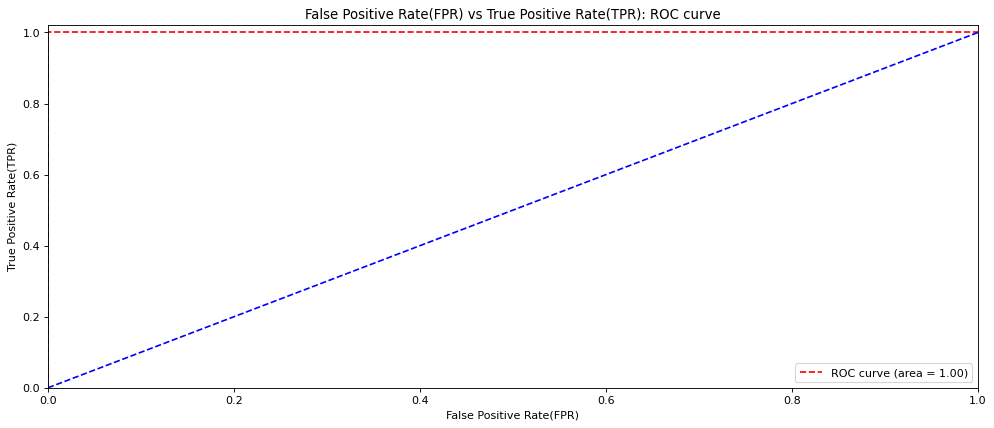

In [98]:
target_col = data_control_upsample['bending']
input_cols = data_control_upsample.drop('bending', axis=1)

model = LogisticRegression(solver='liblinear')
model.fit(input_cols, target_col)
prediction = model.predict(input_cols)
fp, tp, th = roc_curve(target_col, prediction)
roc_auc = auc(fp, tp)

figure(figsize=(15, 6), dpi=80)
plt.plot(fp, tp,'r--', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'b--')

plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('False Positive Rate(FPR) vs True Positive Rate(TPR): ROC curve')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])


In [99]:
confusion_matrix(target_col, prediction)

array([[56,  0],
       [ 0, 64]], dtype=int64)

In [100]:

def L1_penalized_reg():
        log_score_l1 = []
        i=1
        while i < 21:
            xtrain = data_new[i].drop(["bending"], axis=1)
            ytrain = data_new[i]["bending"]
            model = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear")
            model.fit(xtrain, ytrain)
            score = model.score(xtrain, ytrain) 
            log_score_l1.append(score)
            i=i+1
        return log_score_l1
        

In [101]:
log_score_l1=L1_penalized_reg()
log_score_l1

[0.9130434782608695,
 0.8985507246376812,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.927536231884058,
 0.9420289855072463,
 0.9420289855072463,
 0.9420289855072463,
 0.9420289855072463,
 0.927536231884058,
 0.927536231884058,
 1.0,
 0.927536231884058,
 0.927536231884058,
 0.927536231884058]

We can see the accuracy scores for L1-penalized is larger than for all values of l, so, we can say it is performing better. It was also easier to implement

In [102]:
def multinomial():
    log_reg_error = []
    log_reg_train_score = []
    i=1
    while i < 21:
        xtrain = data_new[i].drop(["bending"], axis=1)
        ytrain = data_new[i][["bending"]]
        ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
        ytrain = ytrain.result_column
        xtest = data_new_test[i].drop(["bending"], axis=1)
        ytest = data_new_test[i][["bending"]]

        ytest["result_column"]=[1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
        ytest = ytest.result_column

        model = LogisticRegressionCV(cv=5, penalty="l1", solver="liblinear")
        model.fit(xtrain, ytrain)
        test_error = 1 - model.score(xtest, ytest) 
        log_reg_train_score.append(model.score(xtrain, ytrain))
        log_reg_error.append(test_error)
        i=i+1
    print(log_reg_error)
    return log_reg_error.index(min(log_reg_error))

In [103]:
optimized_index=multinomial()

[0.26315789473684215, 0.21052631578947367, 0.21052631578947367, 0.1578947368421053, 0.26315789473684215, 0.1578947368421053, 0.26315789473684215, 0.26315789473684215, 0.21052631578947367, 0.10526315789473684, 0.10526315789473684, 0.052631578947368474, 0.1578947368421053, 0.3157894736842105, 0.21052631578947367, 0.21052631578947367, 0.368421052631579, 0.26315789473684215, 0.3157894736842105, 0.1578947368421053]


In [104]:
optimized_index

11

In [105]:
def confusion_multiclass():
        xtrain = data_new[optimized_index].drop(["bending"], axis=1)
        ytrain = data_new[optimized_index][["bending"]]
        ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
        ytrain = ytrain.result_column
        xtest = data_new_test[optimized_index].drop(["bending"], axis=1)
        ytest = data_new_test[optimized_index][["bending"]]
        ytest["result_column"]=[1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
        ytest = ytest.result_column

        model = LogisticRegression(solver="liblinear")
        model.fit(xtrain, ytrain)

        prediction = model.predict(xtest)

        return confusion_matrix(ytest, prediction)

In [106]:
matrix=confusion_multiclass()

In [107]:
matrix

array([[3, 1, 0, 0, 0, 0],
       [0, 2, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 2, 1]], dtype=int64)

In [108]:
xtrain = data_new[optimized_index].drop(["bending"], axis=1)
ytrain = data_new[optimized_index][["bending"]]
ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
ytrain = ytrain.result_column
multi_class_train=label_binarize(ytrain,classes=[1,2,3,4,5,6])
classes = multi_class_train.shape[1]


In [109]:
xtest = data_new_test[optimized_index].drop(["bending"], axis=1)
ytest = data_new_test[optimized_index][["bending"]]
ytest["result_column"]=[1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
ytest = ytest.result_column
multi_class_test=label_binarize(ytest,classes=[1,2,3,4,5,6])

In [110]:
log_reg_cv=OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty="l1",solver="liblinear"))
log_reg_cv.fit(xtrain,multi_class_train)
prediction=log_reg_cv.predict(xtest)
log_reg_cv_score=log_reg_cv.fit(xtrain,multi_class_train).decision_function(xtest)


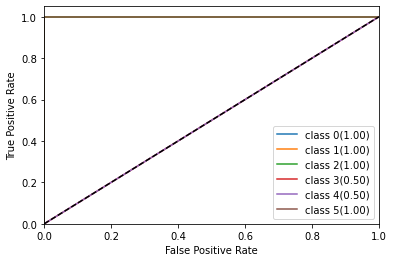

In [111]:
fp = dict()
tp = dict()
roc_auc = dict()

for i in range(classes):
    fp[i], tp[i],threshold= roc_curve(multi_class_test[:, i],log_reg_cv_score[:, i])
    roc_auc[i] = auc(fp[i], tp[i])

    
    
    
    
plt.plot(fp[0],tp[0],label='class 0(%0.2f)'%roc_auc[0])
plt.plot(fp[1],tp[1],label='class 1(%0.2f)'%roc_auc[1])
plt.plot(fp[2],tp[2],label='class 2(%0.2f)'%roc_auc[2])
plt.plot(fp[3],tp[3],label='class 3(%0.2f)'%roc_auc[3])
plt.plot(fp[4],tp[4],label='class 4(%0.2f)'%roc_auc[4])
plt.plot(fp[5],tp[5],label='class 5(%0.2f)'%roc_auc[5])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Naive Bayes assumes conditional independence of the features. However features extracted from the time series are correlated, and hence the Naive assumption is not strong and the classifier might not perform well 

In [112]:
#Gaussian Naive Bayes
gauss_score = []
while i < 21:
        xtrain = data_new[i].drop(["bending"], axis=1)
        ytrain = data_new[i][["bending"]]
        ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
        ytrain = ytrain.result_column

        model = GaussianNB()
        scores = cross_val_score(model, xtrain, ytrain, cv=5)
        gauss_score.append(np.mean(scores))  
        i=i+1

In [113]:
gauss_score

[0.6648351648351648,
 0.6527472527472528,
 0.7384615384615385,
 0.7252747252747251,
 0.6516483516483517,
 0.6824175824175824,
 0.6516483516483517,
 0.5945054945054944,
 0.6230769230769231,
 0.5648351648351648,
 0.5956043956043956,
 0.6087912087912087,
 0.5934065934065934,
 0.5362637362637362,
 0.5648351648351648,
 0.5659340659340659]

In [114]:
optimal_scored_series=gauss_score.index(max(gauss_score))
best_columns = best_features[optimal_scored_series]
xtrain = data_new[optimal_scored_series][best_columns]
ytrain = data_new[optimal_scored_series][["bending"]]
ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
ytrain = ytrain.result_column
xtest = data_new_test[optimal_scored_series][best_columns]
ytest = data_new_test[optimal_scored_series][["bending"]]
ytest["result_column"]=[1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
ytest = ytest.result_column

model = GaussianNB()
model.fit(xtrain, ytrain)

prediction_test=model.predict(xtest)
print(confusion_matrix(ytest, prediction_test))

[[0 2 0 1 0 1]
 [0 2 0 0 1 0]
 [0 0 3 0 0 0]
 [0 0 1 0 1 1]
 [0 0 0 2 1 0]
 [1 0 0 1 0 1]]


In [115]:
#Multinomial Naive Bayes
MNB_score = []
i=1
while i < 21:
        xtrain = data_new[i].drop(["bending"], axis=1)
        ytrain = data_new[i][["bending"]]
        ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
        ytrain = ytrain.result_column

        model = MultinomialNB()
        scores = cross_val_score(model, xtrain, ytrain, cv=5)
        MNB_score.append(np.mean(scores))
        i=i+1

In [116]:
MNB_score

[0.810989010989011,
 0.8109890109890111,
 0.7824175824175824,
 0.8109890109890111,
 0.8109890109890111,
 0.8109890109890111,
 0.8109890109890111,
 0.8109890109890111,
 0.7824175824175824,
 0.8109890109890111,
 0.8252747252747253,
 0.7967032967032968,
 0.8109890109890111,
 0.7967032967032968,
 0.8252747252747253,
 0.7967032967032968,
 0.7967032967032968,
 0.7967032967032968,
 0.7824175824175824,
 0.7967032967032968]

as observed, the multinomial Naive Bayes classifier has higher accuracy than the Guassian Naive Bayes classifier

In [117]:
optimal_scored_series=MNB_score.index(max(MNB_score))

best_columns = best_features[optimal_scored_series]
xtrain = data_new[optimal_scored_series][best_columns]
ytrain = data_new[optimal_scored_series][["bending"]]
ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
ytrain = ytrain.result_column
xtest = data_new_test[optimal_scored_series][best_columns]
ytest = data_new_test[optimal_scored_series][["bending"]]
ytest["result_column"]=[1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
ytest = ytest.result_column

model = MultinomialNB()
model.fit(xtrain, ytrain)

prediction_test=model.predict(xtest)
print(confusion_matrix(ytest, prediction_test))

[[0 4 0 0 0 0]
 [0 3 0 0 0 0]
 [0 3 0 0 0 0]
 [0 3 0 0 0 0]
 [0 3 0 0 0 0]
 [0 3 0 0 0 0]]


In [118]:
xtrain = data_new[optimized_index].drop(["bending"], axis=1)
ytrain = data_new[optimized_index][["bending"]]
ytrain["result_column"]= [1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6]
ytrain = ytrain.result_column
multi_class_train=label_binarize(ytrain,classes=[0,1,2,3,4,5])
classes = multi_class_train.shape[1]

xtest = data_new_test[optimized_index].drop(["bending"], axis=1)
ytest = data_new_test[optimized_index][["bending"]]
ytest["result_column"]=[1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6]
ytest = ytest.result_column
multi_class_test=label_binarize(ytest,classes=[1,2,3,4,5,6])

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(xtrain)
X_test = pca.transform(xtest)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.35462478, 0.28803787])

In [119]:
pca_gauss_score=[]
model = GaussianNB()
model.fit(X_train, ytrain)
prediction_train=model.predict(X_train)
scores = cross_val_score(model, X_train, ytrain, cv=5)
#cross val score
pca_gauss_score.append(np.mean(scores))
pca_gauss_score

[0.7516483516483516]

In [120]:
#Accuracy score
prediction_test=model.predict(X_test)
accuracy_score(ytest,prediction_test)

0.8947368421052632

In [121]:
principal_comp_train_data = pd.DataFrame(data = X_train, columns = ['principal_component_1', 'principal_component_2'])
principal_comp_train_data

,principal_component_1,principal_component_2
0,120.116735,120.363743
1,121.917098,95.134254
2,84.519042,81.246618
3,27.282198,64.797814
4,20.853576,64.034844
...,...,...
64,-118.643212,26.663093
65,-82.862212,-22.649905
66,-70.057813,-15.830078
67,-59.453788,48.571999


In [122]:
prediction_train

array([1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 4, 4, 5, 4, 5, 5, 6, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6], dtype=int64)

<AxesSubplot:>

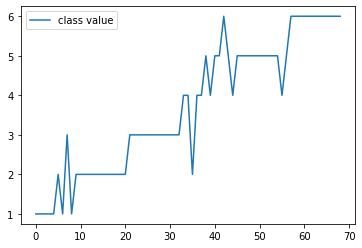

In [123]:
prediction_train=pd.DataFrame(data=prediction_train,columns=['class value'])
prediction_train.plot()

In [124]:
confusion_matrix(ytrain, prediction_train)

array([[ 7,  1,  1,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  1,  0,  6,  4,  1],
       [ 0,  0,  0,  1, 11,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [125]:
pred=model.predict(X_train)
score=model.fit(X_train, ytrain).predict_proba(X_train)

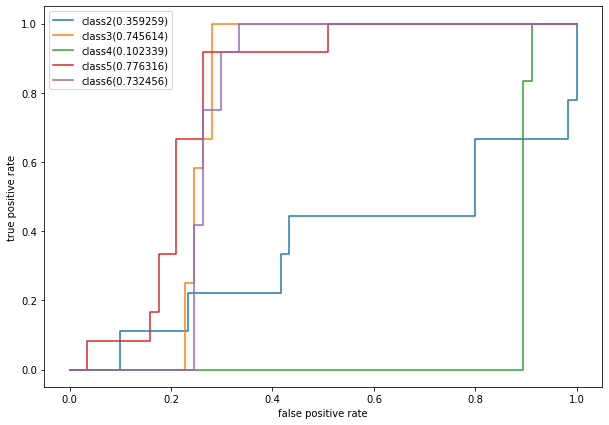

In [126]:
fp=dict()
tp=dict()
r_auc=dict()
classes=multi_class_train.shape[1]
for i in range(classes):
    fp[i], tp[i], thresholds = roc_curve(ytrain, score[:,i],pos_label=i)
    r_auc[i]=auc(fp[i], tp[i])
    
    
plt.figure(figsize=(10,7))
plt.plot(fp[1], tp[1],label='class2(%2f)'%r_auc[1])
plt.plot(fp[2], tp[2],label='class3(%2f)'%r_auc[2])
plt.plot(fp[3], tp[3],label='class4(%2f)'%r_auc[3])
plt.plot(fp[4], tp[4],label='class5(%2f)'%r_auc[4])
plt.plot(fp[5], tp[5],label='class6(%2f)'%r_auc[5])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

the Multinomial Naive Bayes classifier has the highest accuracy